# BLINKIT ANALYSIS

## Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
df = pd.read_csv("blinkit_data.csv")

 #### *Raw Data*

In [18]:
df

,Item Fat Content,Item Identifier,Item Type,Outlet Establishment Year,Outlet Identifier,Outlet Location Type,Outlet Size,Outlet Type,Item Visibility,Item Weight,Sales,Rating
0,Regular,FDX32,Fruits and Vegetables,2012,OUT049,Tier 1,Medium,Supermarket Type1,0.100014,15.10,145.4786,5.0
1,Low Fat,NCB42,Health and Hygiene,2022,OUT018,Tier 3,Medium,Supermarket Type2,0.008596,11.80,115.3492,5.0
2,Regular,FDR28,Frozen Foods,2010,OUT046,Tier 1,Small,Supermarket Type1,0.025896,13.85,165.0210,5.0
3,Regular,FDL50,Canned,2000,OUT013,Tier 3,High,Supermarket Type1,0.042278,12.15,126.5046,5.0
4,Low Fat,DRI25,Soft Drinks,2015,OUT045,Tier 2,Small,Supermarket Type1,0.033970,19.60,55.1614,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,low fat,NCT53,Health and Hygiene,1998,OUT027,Tier 3,Medium,Supermarket Type3,0.000000,NaN,164.5526,4.0
8519,low fat,FDN09,Snack Foods,1998,OUT027,Tier 3,Medium,Supermarket Type3,0.034706,NaN,241.6828,4.0
8520,low fat,DRE13,Soft Drinks,1998,OUT027,Tier 3,Medium,Supermarket Type3,0.027571,NaN,86.6198,4.0
8521,reg,FDT50,Dairy,1998,OUT027,Tier 3,Medium,Supermarket Type3,0.107715,NaN,97.8752,4.0


##### Size of Data

In [19]:
df.shape

(8523, 12)

##### Field Info

In [20]:
df.columns.tolist()

['Item Fat Content',
 'Item Identifier',
 'Item Type',
 'Outlet Establishment Year',
 'Outlet Identifier',
 'Outlet Location Type',
 'Outlet Size',
 'Outlet Type',
 'Item Visibility',
 'Item Weight',
 'Sales',
 'Rating']

##### Data Types

In [88]:
df.dtypes

Item Fat Content              object
Item Identifier               object
Item Type                     object
Outlet Establishment Year      int64
Outlet Identifier             object
Outlet Location Type          object
Outlet Size                   object
Outlet Type                   object
Item Visibility              float64
Item Weight                  float64
Sales                        float64
Rating                       float64
dtype: object

## *DATA CLEANING*

In [21]:
df['Item Fat Content'].unique()

array(['Regular', 'Low Fat', 'low fat', 'LF', 'reg'], dtype=object)

In [22]:
df['Item Identifier'].unique()

array(['FDX32', 'NCB42', 'FDR28', ..., 'FDU60', 'NCX53', 'FDE52'],
      dtype=object)

In [23]:
df['Item Type'].unique()

array(['Fruits and Vegetables', 'Health and Hygiene', 'Frozen Foods',
       'Canned', 'Soft Drinks', 'Household', 'Snack Foods', 'Meat',
       'Breads', 'Hard Drinks', 'Others', 'Dairy', 'Breakfast',
       'Baking Goods', 'Seafood', 'Starchy Foods'], dtype=object)

In [24]:
df['Outlet Establishment Year'].unique()

array([2012, 2022, 2010, 2000, 2015, 2020, 2011, 1998, 2017])

In [25]:
df['Outlet Identifier'].unique()

array(['OUT049', 'OUT018', 'OUT046', 'OUT013', 'OUT045', 'OUT017',
       'OUT010', 'OUT027', 'OUT035', 'OUT019'], dtype=object)

In [26]:
df['Outlet Location Type'].unique()

array(['Tier 1', 'Tier 3', 'Tier 2'], dtype=object)

In [28]:
df['Outlet Size'].unique()

array(['Medium', 'Small', 'High'], dtype=object)

In [29]:
df['Outlet Type'].unique()

array(['Supermarket Type1', 'Supermarket Type2', 'Grocery Store',
       'Supermarket Type3'], dtype=object)

In [30]:
df['Item Visibility'].unique()

array([0.1000135 , 0.00859605, 0.02589649, ..., 0.03470581, 0.02757094,
       0.10771483])

In [31]:
df['Item Weight'].unique()

array([15.1  , 11.8  , 13.85 , 12.15 , 19.6  ,  8.89 , 19.7  , 20.75 ,
          nan, 18.85 , 17.1  , 16.35 , 20.25 , 17.85 , 19.2  , 12.1  ,
        6.85 , 17.25 , 16.   , 13.35 ,  6.695, 16.6  ,  6.92 ,  5.82 ,
       14.8  , 10.1  ,  7.67 , 15.6  ,  9.31 , 13.15 , 16.25 ,  6.75 ,
       10.5  ,  9.3  , 18.1  , 17.5  ,  7.975, 10.   ,  8.93 ,  7.3  ,
        7.93 , 15.35 , 19.35 ,  9.5  ,  5.88 ,  8.88 , 10.6  ,  6.13 ,
        6.38 ,  9.195, 11.3  , 12.6  , 19.1  ,  9.8  ,  7.905, 10.8  ,
       15.5  , 20.7  ,  8.   , 19.5  , 14.   , 11.6  , 10.195, 13.65 ,
        9.6  , 10.695, 12.3  , 11.395, 12.35 , 20.6  ,  6.425,  7.   ,
       16.5  , 13.1  , 16.1  , 15.   , 17.6  , 19.25 , 20.35 ,  6.17 ,
       17.7  , 18.6  , 15.85 ,  9.395, 21.1  ,  8.1  , 11.35 , 11.5  ,
        7.42 , 17.35 ,  5.34 ,  6.385, 12.   , 14.1  ,  8.06 , 13.8  ,
        9.065, 14.3  ,  5.98 , 14.7  , 19.85 ,  6.775,  8.42 , 19.75 ,
       12.85 ,  5.   ,  5.73 ,  7.81 , 14.35 ,  6.465,  7.5  ,  7.72 ,
      

In [32]:
df['Sales'].unique()

array([145.4786, 115.3492, 165.021 , ..., 241.6828,  97.8752, 112.2544])

In [33]:
df['Rating'].unique()

array([5. , 4.9, 4.8, 4.7, 4.6, 4.5, 4.4, 4.3, 4.2, 4.1, 4. , 3.9, 3.8,
       3.7, 3.6, 3.5, 3.4, 3.3, 3.2, 3.1, 3. , 2.9, 2.8, 2.7, 2.6, 2.5,
       2.4, 2.3, 2.2, 2.1, 2. , 1.9, 1.8, 1.7, 1.5, 1.4, 1.3, 1.2, 1. ])

In [34]:
df.dtypes

Item Fat Content              object
Item Identifier               object
Item Type                     object
Outlet Establishment Year      int64
Outlet Identifier             object
Outlet Location Type          object
Outlet Size                   object
Outlet Type                   object
Item Visibility              float64
Item Weight                  float64
Sales                        float64
Rating                       float64
dtype: object

In [51]:
df['Item Fat Content'] = df['Item Fat Content'].replace({"LF":'Low Fat','low fat':'Low Fat','reg':'Regular','Regulat':'Regular'})

C:\Users\acer\AppData\Local\Temp\ipykernel_13832\2630757895.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Item Fat Content'] = df['Item Fat Content'].replace({"LF":'Low Fat','low fat':'Low Fat','reg':'Regular','Regulat':'Regular'})


In [52]:
df['Item Fat Content'].unique()

array(['Regular', 'Low Fat'], dtype=object)

In [35]:
df.isnull().sum()

Item Fat Content                0
Item Identifier                 0
Item Type                       0
Outlet Establishment Year       0
Outlet Identifier               0
Outlet Location Type            0
Outlet Size                     0
Outlet Type                     0
Item Visibility                 0
Item Weight                  1463
Sales                           0
Rating                          0
dtype: int64

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item Fat Content           8523 non-null   object 
 1   Item Identifier            8523 non-null   object 
 2   Item Type                  8523 non-null   object 
 3   Outlet Establishment Year  8523 non-null   int64  
 4   Outlet Identifier          8523 non-null   object 
 5   Outlet Location Type       8523 non-null   object 
 6   Outlet Size                8523 non-null   object 
 7   Outlet Type                8523 non-null   object 
 8   Item Visibility            8523 non-null   float64
 9   Item Weight                7060 non-null   float64
 10  Sales                      8523 non-null   float64
 11  Rating                     8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [179]:
continous =["Item Visibility", "Item Weight", "Sales", "Rating", "Outlet Establishment Year"]
categorical = ['Item Fat Content','Item Type','Outlet Location Type', 'Outlet Size', 'Outlet Type','Item Identifier', 'Outlet Identifier']

In [180]:
df.duplicated().sum()

np.int64(0)

In [181]:
df.isnull().sum()

Item Fat Content             0
Item Type                    0
Outlet Establishment Year    0
Outlet Location Type         0
Outlet Size                  0
Outlet Type                  0
Item Visibility              0
Item Weight                  0
Sales                        0
Rating                       0
dtype: int64

In [182]:
df = df.dropna()

df.isnull().sum()

##### Drop the unwanted columns

In [183]:
df = df.drop(['Item Identifier', 'Outlet Identifier'], axis=1)

KeyError: "['Item Identifier', 'Outlet Identifier'] not found in axis"

In [ ]:
df

In [176]:
df.to_excel("cleaned_blinkit_data.xlsx",index=False)

## CLEANED DATA

In [177]:
df = pd.read_excel("cleaned_blinkit_data.xlsx")

In [178]:
df

,Item Fat Content,Item Type,Outlet Establishment Year,Outlet Location Type,Outlet Size,Outlet Type,Item Visibility,Item Weight,Sales,Rating
0,Regular,Fruits and Vegetables,2012,Tier 1,Medium,Supermarket Type1,0.100014,15.10,145.4786,5.0
1,Low Fat,Health and Hygiene,2022,Tier 3,Medium,Supermarket Type2,0.008596,11.80,115.3492,5.0
2,Regular,Frozen Foods,2010,Tier 1,Small,Supermarket Type1,0.025896,13.85,165.0210,5.0
3,Regular,Canned,2000,Tier 3,High,Supermarket Type1,0.042278,12.15,126.5046,5.0
4,Low Fat,Soft Drinks,2015,Tier 2,Small,Supermarket Type1,0.033970,19.60,55.1614,5.0
...,...,...,...,...,...,...,...,...,...,...
7055,Regular,Canned,2022,Tier 3,Medium,Supermarket Type2,0.034841,19.25,141.1496,4.0
7056,Regular,Fruits and Vegetables,2022,Tier 3,Medium,Supermarket Type2,0.071744,13.30,59.7536,4.0
7057,Regular,Meat,2022,Tier 3,Medium,Supermarket Type2,0.057655,11.80,152.6366,4.0
7058,Regular,Snack Foods,2022,Tier 3,Medium,Supermarket Type2,0.047459,17.25,95.8068,4.0


##### UNIVARIATE

In [99]:
df["Item Fat Content"].value_counts()

Item Fat Content
Low Fat    4566
Regular    2494
Name: count, dtype: int64

-Observation:-in item fat content contain 4566 low fat items and 2494 regular items

In [101]:
df["Item Type"].value_counts()

Item Type
Fruits and Vegetables    1019
Snack Foods               988
Household                 759
Frozen Foods              718
Dairy                     566
Canned                    539
Baking Goods              536
Health and Hygiene        430
Soft Drinks               374
Meat                      337
Breads                    204
Hard Drinks               183
Others                    137
Starchy Foods             130
Breakfast                  89
Seafood                    51
Name: count, dtype: int64

-Observation:-Here item type columns contain multiple types of items and the number of fruits and vegetables is more ans seafood contain less.

In [102]:
df["Outlet Establishment Year"].value_counts()

Outlet Establishment Year
2000    932
2012    930
2010    930
2017    930
2015    929
2022    928
2020    926
2011    555
Name: count, dtype: int64

-Obervation:-here it shows the how many outlet will established between 2000 t0 2011.

In [103]:
df["Outlet Location Type"].value_counts()

Outlet Location Type
Tier 2    2785
Tier 3    2415
Tier 1    1860
Name: count, dtype: int64

In [104]:
df["Outlet Size"].value_counts()

Outlet Size
Medium    2696
Small     2611
High      1753
Name: count, dtype: int64

In [105]:
df["Outlet Type"].value_counts()

Outlet Type
Supermarket Type1    5577
Supermarket Type2     928
Grocery Store         555
Name: count, dtype: int64

In [106]:
df["Item Visibility"].value_counts()

Item Visibility
0.000000    436
0.076975      3
0.037640      2
0.074565      2
0.076841      2
           ... 
0.034841      1
0.071744      1
0.057655      1
0.047459      1
0.033970      1
Name: count, Length: 6519, dtype: int64

In [108]:
df["Item Weight"].value_counts()

Item Weight
12.150    86
17.600    82
13.650    77
11.800    76
9.300     68
          ..
7.605      2
9.420      1
6.520      1
7.685      1
5.400      1
Name: count, Length: 415, dtype: int64

In [110]:
df["Sales"].value_counts()

Sales
196.5768    6
170.5422    6
142.0154    6
172.0422    5
49.8008     5
           ..
33.6558     1
162.7210    1
49.2376     1
179.5660    1
256.4330    1
Name: count, Length: 5225, dtype: int64

In [111]:
df["Rating"].value_counts()

Rating
4.0    2724
4.3     576
4.2     572
4.1     438
5.0     362
4.4     281
3.9     249
4.5     210
3.8     207
3.7     174
3.0     155
3.5     148
3.6     123
3.3     105
1.0      97
4.6      87
3.4      76
4.7      68
2.0      64
4.8      51
3.2      45
2.5      43
3.1      40
2.8      38
2.9      20
2.7      19
2.3      18
2.6      14
4.9      12
2.4       8
1.5       8
2.2       8
1.7       7
1.8       5
2.1       3
1.9       2
1.3       2
1.2       1
Name: count, dtype: int64

In [113]:
df

,Item Fat Content,Item Type,Outlet Establishment Year,Outlet Location Type,Outlet Size,Outlet Type,Item Visibility,Item Weight,Sales,Rating
0,Regular,Fruits and Vegetables,2012,Tier 1,Medium,Supermarket Type1,0.100014,15.10,145.4786,5.0
1,Low Fat,Health and Hygiene,2022,Tier 3,Medium,Supermarket Type2,0.008596,11.80,115.3492,5.0
2,Regular,Frozen Foods,2010,Tier 1,Small,Supermarket Type1,0.025896,13.85,165.0210,5.0
3,Regular,Canned,2000,Tier 3,High,Supermarket Type1,0.042278,12.15,126.5046,5.0
4,Low Fat,Soft Drinks,2015,Tier 2,Small,Supermarket Type1,0.033970,19.60,55.1614,5.0
...,...,...,...,...,...,...,...,...,...,...
7055,Regular,Canned,2022,Tier 3,Medium,Supermarket Type2,0.034841,19.25,141.1496,4.0
7056,Regular,Fruits and Vegetables,2022,Tier 3,Medium,Supermarket Type2,0.071744,13.30,59.7536,4.0
7057,Regular,Meat,2022,Tier 3,Medium,Supermarket Type2,0.057655,11.80,152.6366,4.0
7058,Regular,Snack Foods,2022,Tier 3,Medium,Supermarket Type2,0.047459,17.25,95.8068,4.0


#### BIVARIATE

In [112]:
df.groupby("Outlet Type")["Sales"].describe().T

Outlet Type,Grocery Store,Supermarket Type1,Supermarket Type2
count,555.000000,5577.000000,928.000000
mean,140.777594,141.213894,141.678634
std,62.221084,62.341122,63.012992
min,32.655800,31.490000,31.890000
25%,94.659400,94.046200,94.392950
50%,143.912800,143.115400,140.566700
75%,185.425300,185.826600,187.554950
max,266.688400,266.888400,265.188400


In [118]:
df.groupby("Item Type")["Item Weight"].describe().T

Item Type,Baking Goods,Breads,Breakfast,Canned,Dairy,Frozen Foods,Fruits and Vegetables,Hard Drinks,Health and Hygiene,Household,Meat,Others,Seafood,Snack Foods,Soft Drinks,Starchy Foods
count,536.000000,204.000000,89.000000,539.000000,566.000000,718.000000,1019.000000,183.000000,430.000000,759.000000,337.000000,137.000000,51.000000,988.000000,374.000000,130.000000
mean,12.277108,11.346936,12.768202,12.305705,13.426069,12.867061,13.224769,11.400328,13.142314,13.384736,12.817344,13.853285,12.552843,12.987880,11.847460,13.690731
std,4.773622,4.440540,5.038131,4.586564,4.686532,4.507383,4.575275,4.239144,4.512313,4.998845,4.670812,4.225534,5.473830,4.531256,4.403699,4.010061
min,4.880000,4.635000,6.425000,4.615000,4.805000,4.555000,5.460000,4.610000,5.175000,5.030000,5.150000,5.500000,5.365000,5.095000,4.590000,6.695000
25%,8.235000,7.128750,8.060000,8.115000,9.277500,8.935000,9.195000,8.260000,9.695000,8.695000,9.300000,10.650000,7.420000,9.195000,8.260000,11.500000
50%,11.650000,10.600000,10.695000,12.150000,13.350000,12.850000,13.100000,10.100000,12.150000,13.150000,12.350000,14.500000,11.650000,13.150000,11.800000,13.175000
75%,15.750000,14.850000,17.250000,16.250000,17.600000,17.000000,17.100000,14.850000,17.600000,18.350000,17.200000,17.750000,17.750000,16.850000,15.350000,16.700000
max,20.850000,20.850000,21.100000,21.350000,20.700000,20.850000,21.350000,19.700000,21.250000,21.250000,21.250000,20.500000,20.750000,21.250000,20.750000,21.200000


In [119]:
##pd.crosstab(df["Outlet Size"], df["Outlet Type"])
pd.crosstab(df["Outlet Size"],df["Outlet Type"],margins=True)

Outlet Type,Grocery Store,Supermarket Type1,Supermarket Type2,All
Outlet Size,,,,
High,233,1520,0,1753
Medium,265,1503,928,2696
Small,57,2554,0,2611
All,555,5577,928,7060


In [121]:
pd.crosstab(df["Item Type"], df["Item Fat Content"],margins=True)

Item Fat Content,Low Fat,Regular,All
Item Type,,,
Baking Goods,262,274,536
Breads,113,91,204
Breakfast,34,55,89
Canned,286,253,539
Dairy,354,212,566
Frozen Foods,375,343,718
Fruits and Vegetables,518,501,1019
Hard Drinks,183,0,183
Health and Hygiene,430,0,430


In [123]:
pd.crosstab(df["Item Fat Content"], df["Item Type"],margins=True)

Item Type,Baking Goods,Breads,Breakfast,Canned,Dairy,Frozen Foods,Fruits and Vegetables,Hard Drinks,Health and Hygiene,Household,Meat,Others,Seafood,Snack Foods,Soft Drinks,Starchy Foods,All
Item Fat Content,,,,,,,,,,,,,,,,,
Low Fat,262,113,34,286,354,375,518,183,430,759,132,137,29,565,315,74,4566
Regular,274,91,55,253,212,343,501,0,0,0,205,0,22,423,59,56,2494
All,536,204,89,539,566,718,1019,183,430,759,337,137,51,988,374,130,7060


In [124]:
pd.crosstab(df["Item Fat Content"], df["Outlet Location Type"],margins=True)



Outlet Location Type,Tier 1,Tier 2,Tier 3,All
Item Fat Content,,,,
Low Fat,1194,1809,1563,4566
Regular,666,976,852,2494
All,1860,2785,2415,7060


In [125]:
pd.crosstab(df["Item Fat Content"], df["Outlet Size"],margins=True)

Outlet Size,High,Medium,Small,All
Item Fat Content,,,,
Low Fat,853,1824,1889,4566
Regular,900,872,722,2494
All,1753,2696,2611,7060


In [126]:
pd.crosstab(df["Item Fat Content"], df["Outlet Type"],margins=True)

Outlet Type,Grocery Store,Supermarket Type1,Supermarket Type2,All
Item Fat Content,,,,
Low Fat,359,3609,598,4566
Regular,196,1968,330,2494
All,555,5577,928,7060


In [129]:
df.groupby("Item Type")["Item Weight"].mean()

Item Type
Baking Goods             12.277108
Breads                   11.346936
Breakfast                12.768202
Canned                   12.305705
Dairy                    13.426069
Frozen Foods             12.867061
Fruits and Vegetables    13.224769
Hard Drinks              11.400328
Health and Hygiene       13.142314
Household                13.384736
Meat                     12.817344
Others                   13.853285
Seafood                  12.552843
Snack Foods              12.987880
Soft Drinks              11.847460
Starchy Foods            13.690731
Name: Item Weight, dtype: float64

In [130]:
df.groupby("Item Type")["Sales"].mean()

Item Type
Baking Goods             126.097226
Breads                   140.505808
Breakfast                142.653791
Canned                   139.244894
Dairy                    149.340097
Frozen Foods             139.222677
Fruits and Vegetables    144.444517
Hard Drinks              138.041625
Health and Hygiene       131.125121
Household                149.156972
Meat                     139.940359
Others                   135.945964
Seafood                  145.050282
Snack Foods              146.709644
Soft Drinks              131.803935
Starchy Foods            147.692132
Name: Sales, dtype: float64

In [131]:
df.groupby("Item Type")["Rating"].mean()

Item Type
Baking Goods             3.980597
Breads                   3.894608
Breakfast                3.939326
Canned                   4.003340
Dairy                    3.972438
Frozen Foods             3.969220
Fruits and Vegetables    3.950343
Hard Drinks              3.949727
Health and Hygiene       3.980930
Household                3.991304
Meat                     4.029674
Others                   3.912409
Seafood                  3.933333
Snack Foods              3.959615
Soft Drinks              3.904545
Starchy Foods            3.880000
Name: Rating, dtype: float64

In [132]:
df.groupby("Item Type")["Outlet Establishment Year"].mean()

Item Type
Baking Goods             2013.388060
Breads                   2013.573529
Breakfast                2013.247191
Canned                   2013.836735
Dairy                    2013.280919
Frozen Foods             2013.527855
Fruits and Vegetables    2013.378803
Hard Drinks              2013.409836
Health and Hygiene       2013.400000
Household                2013.328063
Meat                     2013.563798
Others                   2013.620438
Seafood                  2013.980392
Snack Foods              2013.651822
Soft Drinks              2013.585561
Starchy Foods            2013.461538
Name: Outlet Establishment Year, dtype: float64

In [133]:
df.groupby("Outlet Size")["Item Weight"].mean()

Outlet Size
High      13.007085
Medium    12.832821
Small     12.782945
Name: Item Weight, dtype: float64

In [134]:
df.groupby("Outlet Size")["Sales"].mean()

Outlet Size
High      142.037412
Medium    139.903952
Small     142.086015
Name: Sales, dtype: float64

In [135]:
df.groupby("Outlet Size")["Rating"].mean()

Outlet Size
High      3.945351
Medium    3.985905
Small     3.957641
Name: Rating, dtype: float64

In [136]:
df.groupby("Outlet Size")["Outlet Establishment Year"].mean()

Outlet Size
High      2007.389047
Medium    2016.433976
Small     2014.548832
Name: Outlet Establishment Year, dtype: float64

In [137]:
df.groupby("Outlet Type")["Item Visibility"].mean()

Outlet Type
Grocery Store        0.101457
Supermarket Type1    0.060723
Supermarket Type2    0.061014
Name: Item Visibility, dtype: float64

In [138]:
df.groupby("Outlet Type")["Item Weight"].mean()

Outlet Type
Grocery Store        12.913153
Supermarket Type1    12.849509
Supermarket Type2    12.873346
Name: Item Weight, dtype: float64

In [139]:
df.groupby("Outlet Type")["Sales"].mean()

Outlet Type
Grocery Store        140.777594
Supermarket Type1    141.213894
Supermarket Type2    141.678634
Name: Sales, dtype: float64

In [140]:
df.groupby("Outlet Type")["Rating"].mean()

Outlet Type
Grocery Store        3.977117
Supermarket Type1    3.963242
Supermarket Type2    3.971228
Name: Rating, dtype: float64

In [141]:
df.groupby("Outlet Type")["Outlet Establishment Year"].mean()

Outlet Type
Grocery Store        2011.000000
Supermarket Type1    2012.322933
Supermarket Type2    2022.000000
Name: Outlet Establishment Year, dtype: float64

In [148]:
df.groupby("Outlet Location Type")["Item Visibility"].mean()


Outlet Location Type
Tier 1    0.060635
Tier 2    0.061038
Tier 3    0.069901
Name: Item Visibility, dtype: float64

In [144]:
df.groupby("Outlet Location Type")["Item Weight"].mean()

Outlet Location Type
Tier 1    12.892124
Tier 2    12.768628
Tier 3    12.933745
Name: Item Weight, dtype: float64

In [145]:
df.groupby("Outlet Location Type")["Sales"].mean()

Outlet Location Type
Tier 1    141.177543
Tier 2    141.167196
Tier 3    141.374059
Name: Sales, dtype: float64

In [146]:
df.groupby("Outlet Location Type")["Rating"].mean()

Outlet Location Type
Tier 1    3.971935
Tier 2    3.962011
Tier 3    3.964224
Name: Rating, dtype: float64

In [147]:
df.groupby("Outlet Location Type")["Outlet Establishment Year"].mean()

Outlet Location Type
Tier 1    2011.000000
Tier 2    2017.330341
Tier 3    2010.981781
Name: Outlet Establishment Year, dtype: float64

#### MULTIVARIATE

In [149]:
df.groupby("Outlet Type")[["Item Visibility", "Item Weight", "Sales", "Rating"]].mean()


,Item Visibility,Item Weight,Sales,Rating
Outlet Type,,,,
Grocery Store,0.101457,12.913153,140.777594,3.977117
Supermarket Type1,0.060723,12.849509,141.213894,3.963242
Supermarket Type2,0.061014,12.873346,141.678634,3.971228


In [150]:
df.groupby("Item Type")[["Item Visibility", "Item Weight", "Sales", "Rating"]].mean()


,Item Visibility,Item Weight,Sales,Rating
Item Type,,,,
Baking Goods,0.066807,12.277108,126.097226,3.980597
Breads,0.064834,11.346936,140.505808,3.894608
Breakfast,0.081250,12.768202,142.653791,3.939326
Canned,0.067316,12.305705,139.244894,4.003340
Dairy,0.069207,13.426069,149.340097,3.972438
Frozen Foods,0.063955,12.867061,139.222677,3.969220
Fruits and Vegetables,0.065985,13.224769,144.444517,3.950343
Hard Drinks,0.064988,11.400328,138.041625,3.949727
Health and Hygiene,0.054000,13.142314,131.125121,3.980930


In [151]:
df.groupby("Outlet Size")[["Item Visibility", "Item Weight", "Sales", "Rating"]].mean()


,Item Visibility,Item Weight,Sales,Rating
Outlet Size,,,,
High,0.067532,13.007085,142.037412,3.945351
Medium,0.064225,12.832821,139.903952,3.985905
Small,0.061298,12.782945,142.086015,3.957641


In [153]:
df[["Item Visibility", "Item Weight", "Sales", "Rating"]].describe()


,Item Visibility,Item Weight,Sales,Rating
count,7060.000000,7060.000000,7060.000000,7060.000000
mean,0.063963,12.857645,141.240683,3.965382
std,0.048625,4.643456,62.411888,0.610523
min,0.000000,4.555000,31.490000,1.000000
25%,0.026768,8.773750,94.143600,4.000000
50%,0.052493,12.600000,142.729900,4.000000
75%,0.092774,16.850000,186.024000,4.200000
max,0.311090,21.350000,266.888400,5.000000


In [154]:
df.groupby("Item Type")[["Sales", "Rating"]].mean()


,Sales,Rating
Item Type,,
Baking Goods,126.097226,3.980597
Breads,140.505808,3.894608
Breakfast,142.653791,3.939326
Canned,139.244894,4.003340
Dairy,149.340097,3.972438
Frozen Foods,139.222677,3.969220
Fruits and Vegetables,144.444517,3.950343
Hard Drinks,138.041625,3.949727
Health and Hygiene,131.125121,3.980930


In [155]:
df.groupby(["Outlet Type", "Outlet Size"])["Sales"].mean()


Outlet Type        Outlet Size
Grocery Store      High           139.785936
                   Medium         140.294752
                   Small          147.076007
Supermarket Type1  High           142.382540
                   Medium         138.739303
                   Small          141.974649
Supermarket Type2  Medium         141.678634
Name: Sales, dtype: float64

In [156]:
df.groupby(["Item Type", "Item Fat Content"])["Sales"].mean()


Item Type              Item Fat Content
Baking Goods           Low Fat             121.515942
                       Regular             130.477869
Breads                 Low Fat             135.469935
                       Regular             146.759145
Breakfast              Low Fat             165.029541
                       Regular             128.821509
Canned                 Low Fat             138.459121
                       Regular             140.133160
Dairy                  Low Fat             147.925251
                       Regular             151.702623
Frozen Foods           Low Fat             140.174981
                       Regular             138.181528
Fruits and Vegetables  Low Fat             136.327526
                       Regular             152.836936
Hard Drinks            Low Fat             138.041625
Health and Hygiene     Low Fat             131.125121
Household              Low Fat             149.156972
Meat                   Low Fat            

In [157]:
df.groupby(["Outlet Location Type", "Outlet Type"])["Rating"].mean()


Outlet Location Type  Outlet Type      
Tier 1                Supermarket Type1    3.971935
Tier 2                Supermarket Type1    3.962011
Tier 3                Grocery Store        3.977117
                      Supermarket Type1    3.949571
                      Supermarket Type2    3.971228
Name: Rating, dtype: float64

In [158]:
result = df.groupby(["Outlet Size", "Outlet Type"])["Sales"].mean()
print(result)


Outlet Size  Outlet Type      
High         Grocery Store        139.785936
             Supermarket Type1    142.382540
Medium       Grocery Store        140.294752
             Supermarket Type1    138.739303
             Supermarket Type2    141.678634
Small        Grocery Store        147.076007
             Supermarket Type1    141.974649
Name: Sales, dtype: float64


In [159]:
result = df.groupby(["Outlet Location Type", "Outlet Type"])["Sales"].mean()
print(result)


Outlet Location Type  Outlet Type      
Tier 1                Supermarket Type1    141.177543
Tier 2                Supermarket Type1    141.167196
Tier 3                Grocery Store        140.777594
                      Supermarket Type1    141.425982
                      Supermarket Type2    141.678634
Name: Sales, dtype: float64


In [160]:
result = df.groupby(["Item Type", "Outlet Type"])["Sales"].mean()
print(result)


Item Type              Outlet Type      
Baking Goods           Grocery Store        126.867862
                       Supermarket Type1    125.975262
                       Supermarket Type2    126.385315
Breads                 Grocery Store        154.880776
                       Supermarket Type1    140.567553
                       Supermarket Type2    131.089007
Breakfast              Grocery Store        167.880733
                       Supermarket Type1    141.656571
                       Supermarket Type2    129.384500
Canned                 Grocery Store        130.034846
                       Supermarket Type1    140.021853
                       Supermarket Type2    139.134218
Dairy                  Grocery Store        155.996656
                       Supermarket Type1    149.288209
                       Supermarket Type2    145.738967
Frozen Foods           Grocery Store        136.292359
                       Supermarket Type1    138.720939
                       S

In [161]:
result = df.groupby(["Item Fat Content", "Outlet Type"])["Sales"].mean()
print(result)


Item Fat Content  Outlet Type      
Low Fat           Grocery Store        144.250222
                  Supermarket Type1    140.727707
                  Supermarket Type2    141.880614
Regular           Grocery Store        134.417015
                  Supermarket Type1    142.105483
                  Supermarket Type2    141.312622
Name: Sales, dtype: float64


In [162]:
result = df.groupby(["Item Type", "Outlet Size"])["Sales"].mean()
print(result)


Item Type              Outlet Size
Baking Goods           High           132.537150
                       Medium         121.050233
                       Small          126.200721
Breads                 High           138.819872
                       Medium         139.570488
                       Small          142.686541
Breakfast              High           156.665531
                       Medium         138.295362
                       Small          134.844431
Canned                 High           141.316639
                       Medium         135.329012
                       Small          142.014792
Dairy                  High           151.744637
                       Medium         150.389048
                       Small          146.418828
Frozen Foods           High           136.536913
                       Medium         142.155126
                       Small          138.150050
Fruits and Vegetables  High           143.938931
                       Medium     

In [163]:
result = df.groupby(["Item Fat Content", "Outlet Size"])["Sales"].mean()
print(result)


Item Fat Content  Outlet Size
Low Fat           High           144.035510
                  Medium         139.503630
                  Small          141.450408
Regular           High           140.143660
                  Medium         140.741322
                  Small          143.748981
Name: Sales, dtype: float64


In [164]:
result = df.groupby("Outlet Type")[["Sales", "Rating"]].mean()
print(result)


                        Sales    Rating
Outlet Type                            
Grocery Store      140.777594  3.977117
Supermarket Type1  141.213894  3.963242
Supermarket Type2  141.678634  3.971228


In [165]:
result = df.groupby("Item Type")[["Sales", "Item Weight"]].mean()
print(result)


                            Sales  Item Weight
Item Type                                     
Baking Goods           126.097226    12.277108
Breads                 140.505808    11.346936
Breakfast              142.653791    12.768202
Canned                 139.244894    12.305705
Dairy                  149.340097    13.426069
Frozen Foods           139.222677    12.867061
Fruits and Vegetables  144.444517    13.224769
Hard Drinks            138.041625    11.400328
Health and Hygiene     131.125121    13.142314
Household              149.156972    13.384736
Meat                   139.940359    12.817344
Others                 135.945964    13.853285
Seafood                145.050282    12.552843
Snack Foods            146.709644    12.987880
Soft Drinks            131.803935    11.847460
Starchy Foods          147.692132    13.690731


In [166]:
result = df.groupby("Outlet Size")[["Sales", "Item Visibility"]].mean()
print(result)


                  Sales  Item Visibility
Outlet Size                             
High         142.037412         0.067532
Medium       139.903952         0.064225
Small        142.086015         0.061298


In [167]:
df["Item Fat Content"].value_counts()

Item Fat Content
Low Fat    4566
Regular    2494
Name: count, dtype: int64

In [58]:
total_sales=df['Sales'].sum()
avg_sales=df['Sales'].mean()
no_of_items_sold=df['Sales'].count()
avg_rating=df['Rating'].mean()



In [59]:
print(total_sales)

997159.2238


In [60]:
print(avg_sales)

141.24068325779038


In [61]:
print(no_of_items_sold)

7060


In [62]:
print(avg_rating)

3.965382436260623


## *charts Requirtment*

##### Total Sales by Fat Content

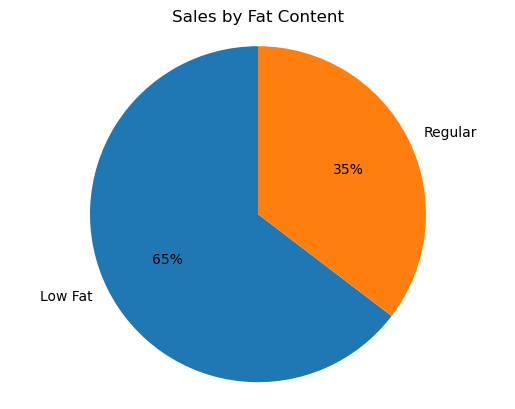

In [65]:
sales_by_fat=df.groupby("Item Fat Content")['Sales'].sum()

plt.pie(sales_by_fat,labels=sales_by_fat.index,autopct='%.0f%%',startangle=90)

plt.title("Sales by Fat Content")
plt.axis('equal')
plt.show()

##### Total Sales By Item Type

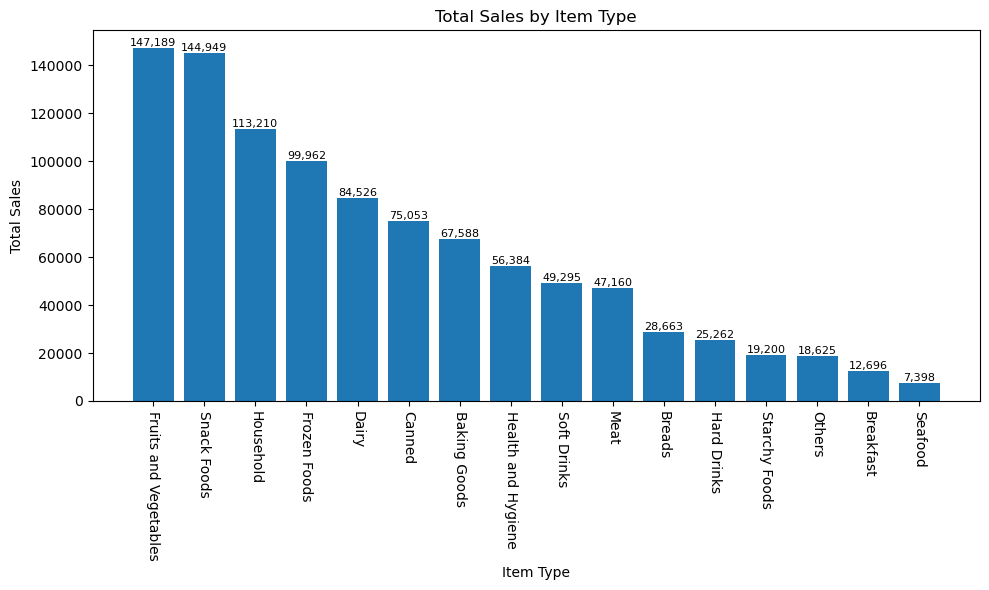

In [70]:
sales_by_type=df.groupby('Item Type')['Sales'].sum().sort_values(ascending=False)
plt.figure(figsize=(10,6))
bars=plt.bar(sales_by_type.index,sales_by_type.values)

plt.xticks(rotation=-90)
plt.xlabel('Item Type')
plt.ylabel('Total Sales')
plt.title('Total Sales by Item Type')

for bar in bars:
    plt.text(bar.get_x()+bar.get_width()/2,bar.get_height(),f'{bar.get_height():,.0f}',ha='center',va='bottom',fontsize=8)

plt.tight_layout()
plt.show()

#### Fat Content By Outlet for Total sales

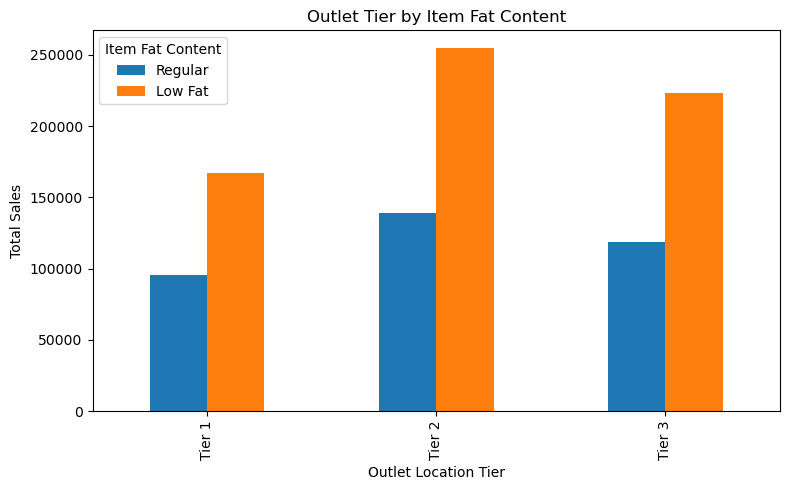

In [73]:
grouped=df.groupby(['Outlet Location Type','Item Fat Content'])['Sales'].sum().unstack()
grouped=grouped[['Regular','Low Fat']]

ax=grouped.plot(kind='bar',figsize=(8,5), title='Outlet Tier by Item Fat Content')
plt.xlabel('Outlet Location Tier')
plt.ylabel('Total Sales')
plt.legend(title='Item Fat Content')
plt.tight_layout()
plt.show()

##### Total Sales by Outlet Establishment

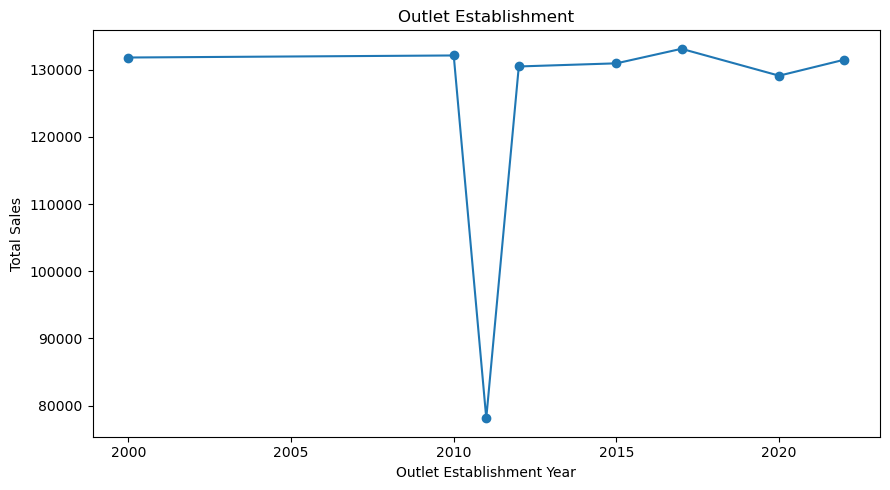

In [76]:
sales_by_year=df.groupby('Outlet Establishment Year')['Sales'].sum().sort_index()

plt.figure(figsize=(9,5))
plt.plot(sales_by_year.index, sales_by_year.values, marker='o',linestyle='-')

plt.xlabel('Outlet Establishment Year')
plt.ylabel('Total Sales')
plt.title('Outlet Establishment')

plt.tight_layout()
plt.show()

#### Sales by Outlet Size

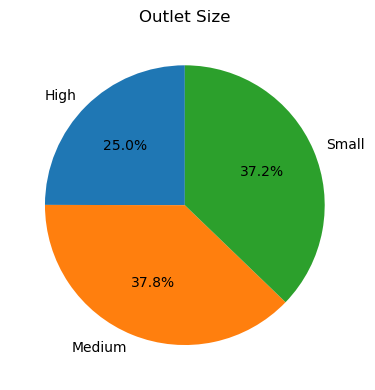

In [84]:
sales_by_size=df.groupby('Outlet Size')['Sales'].sum()

plt.figure(figsize=(4,4))
plt.pie(sales_by_size,labels=sales_by_size.index, autopct='%1.1f%%', startangle=90)
plt.title('Outlet Size')
plt.tight_layout()
plt.show()

#### Sales by Outlet Location

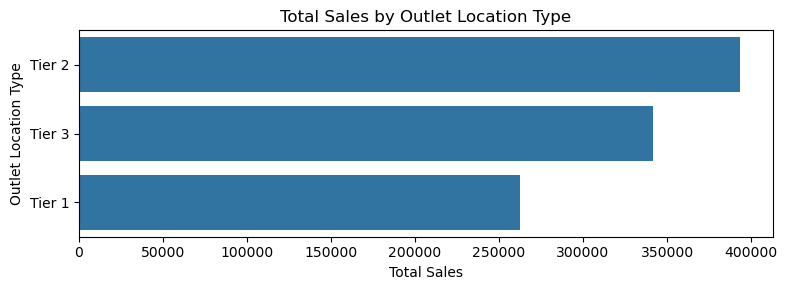

In [87]:
sales_by_location=df.groupby('Outlet Location Type')['Sales'].sum().reset_index()
sales_by_location=sales_by_location.sort_values('Sales',ascending=False)

plt.figure(figsize=(8,3))
ax=sns.barplot(x='Sales',y='Outlet Location Type',data=sales_by_location)

plt.title('Total Sales by Outlet Location Type')
plt.xlabel('Total Sales')
plt.ylabel('Outlet Location Type')

plt.tight_layout()
plt.show()

## Plots for Univariate

##### Plots for continous value

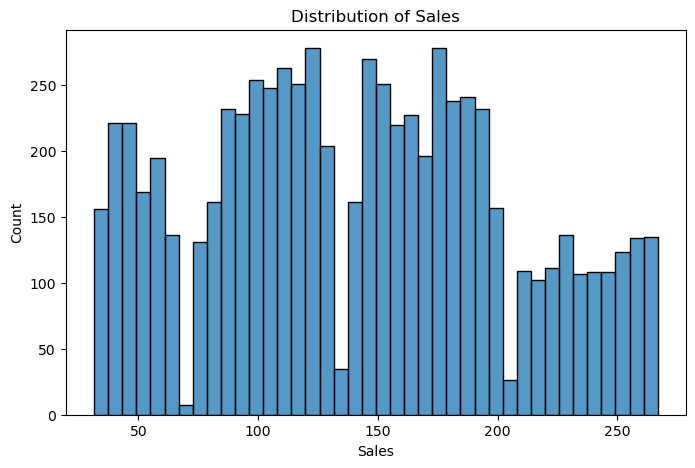

In [184]:
plt.figure(figsize=(8,5))
sns.histplot(df["Sales"].dropna(), bins=40, kde=False)
plt.title("Distribution of Sales")
plt.show()


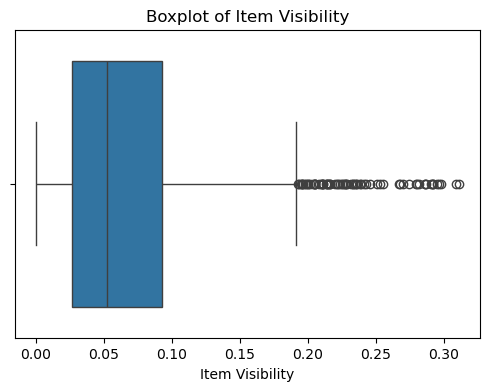

In [185]:
plt.figure(figsize=(6,4))
sns.boxplot(x=df["Item Visibility"].dropna())
plt.title("Boxplot of Item Visibility")
plt.show()


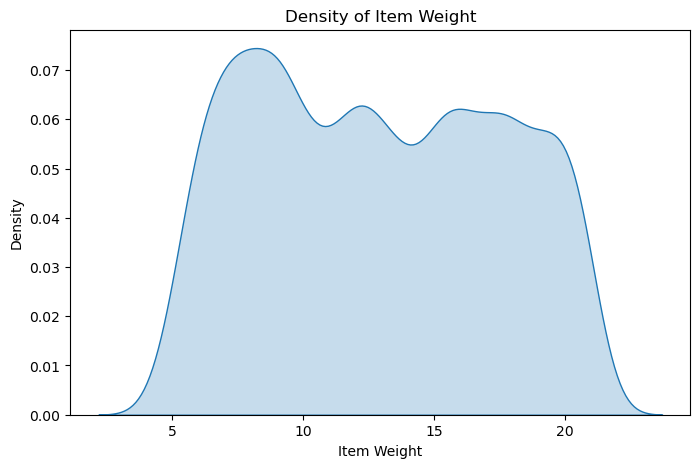

In [186]:
plt.figure(figsize=(8,5))
sns.kdeplot(df["Item Weight"].dropna(), fill=True)
plt.title("Density of Item Weight")
plt.show()


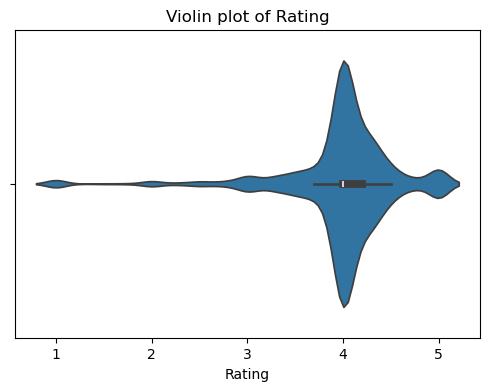

In [187]:
plt.figure(figsize=(6,4))
sns.violinplot(x=df["Rating"].dropna())
plt.title("Violin plot of Rating")
plt.show()


##### Plots for Categorical value

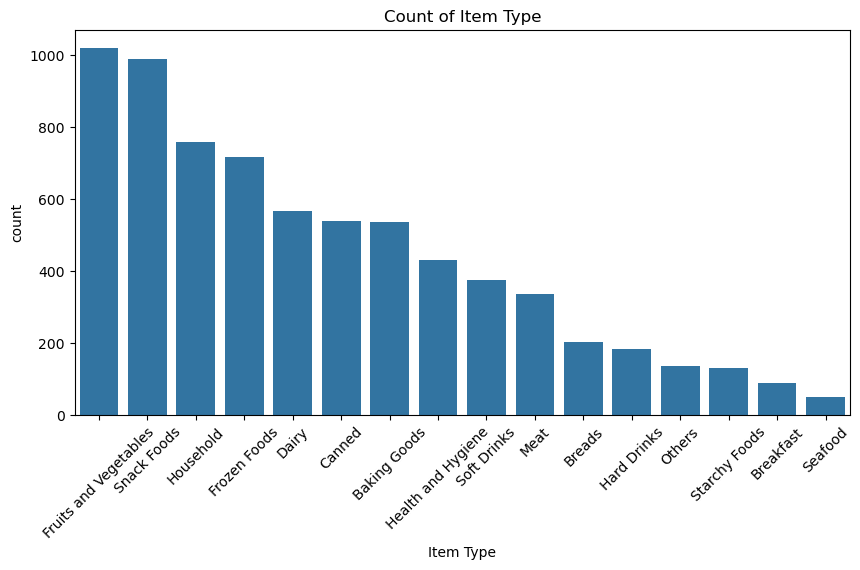

In [188]:
plt.figure(figsize=(10,5))
sns.countplot(data=df, x="Item Type", order=df["Item Type"].value_counts().index)
plt.xticks(rotation=45)
plt.title("Count of Item Type")
plt.show()


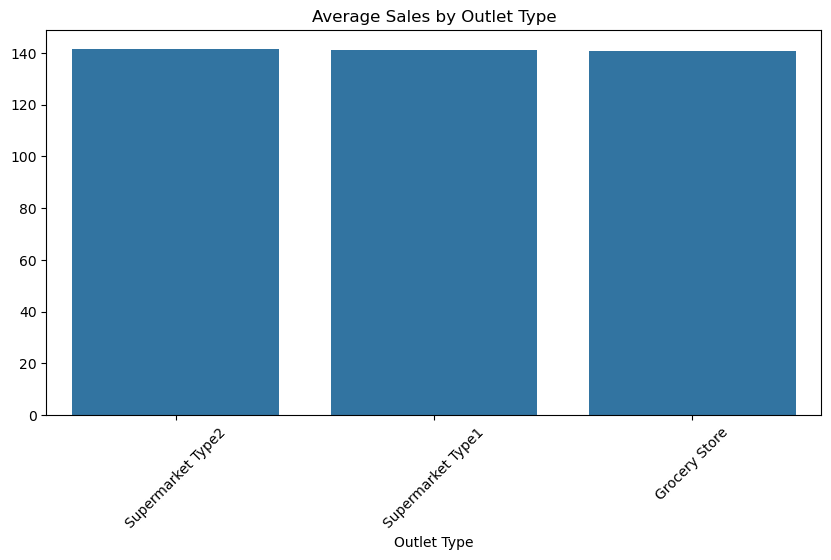

In [189]:
plt.figure(figsize=(10,5))
means = df.groupby("Outlet Type")["Sales"].mean().sort_values(ascending=False)
sns.barplot(x=means.index, y=means.values)
plt.xticks(rotation=45)
plt.title("Average Sales by Outlet Type")
plt.show()


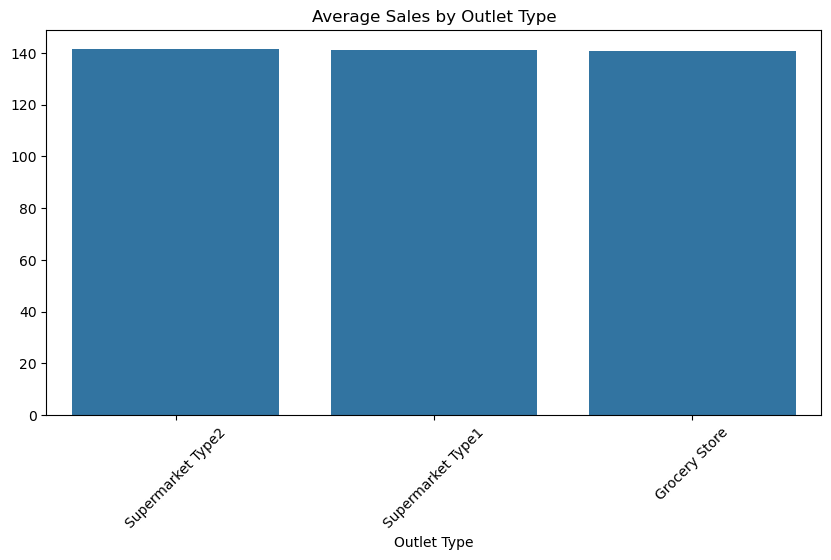

In [190]:
plt.figure(figsize=(10,5))
means = df.groupby("Outlet Type")["Sales"].mean().sort_values(ascending=False)
sns.barplot(x=means.index, y=means.values)
plt.xticks(rotation=45)
plt.title("Average Sales by Outlet Type")
plt.show()


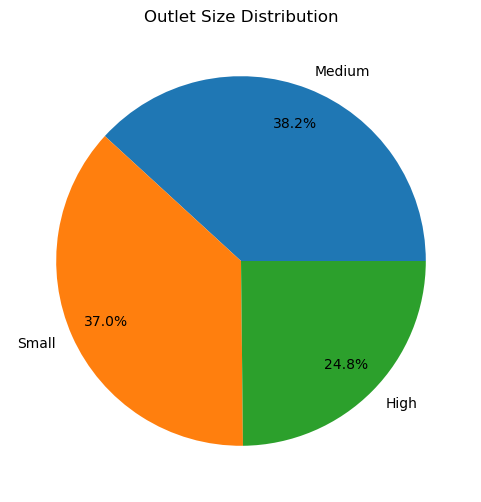

In [193]:
plt.figure(figsize=(6,6))
df["Outlet Size"].value_counts().plot.pie(autopct="%1.1f%%", pctdistance=0.8)
plt.ylabel("")
plt.title("Outlet Size Distribution")
plt.show()


## PLOTS FOR BIVARIATE

C:\Users\acer\AppData\Local\Temp\ipykernel_13832\31932287.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x="Outlet Type", y="Sales", estimator="mean", ci=None)


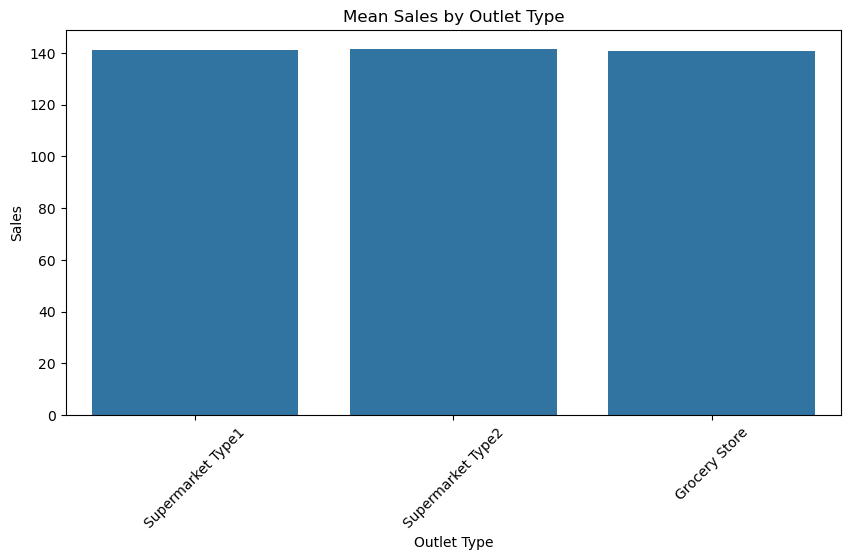

In [194]:
plt.figure(figsize=(10,5))
sns.barplot(data=df, x="Outlet Type", y="Sales", estimator="mean", ci=None)
plt.xticks(rotation=45)
plt.title("Mean Sales by Outlet Type")
plt.show()


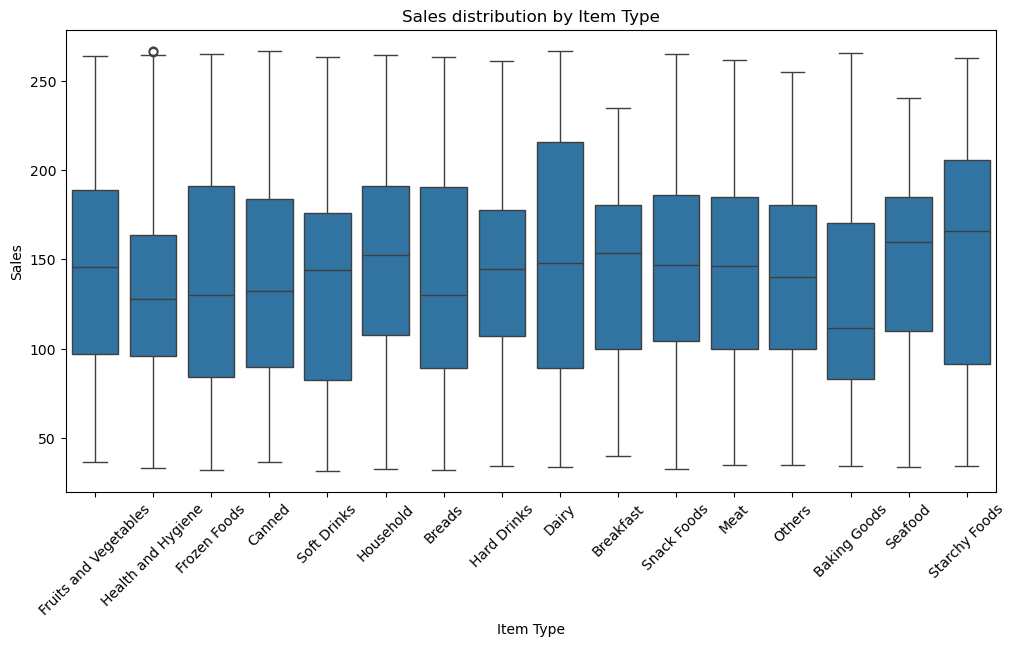

In [195]:
plt.figure(figsize=(12,6))
sns.boxplot(data=df, x="Item Type", y="Sales")
plt.xticks(rotation=45)
plt.title("Sales distribution by Item Type")
plt.show()


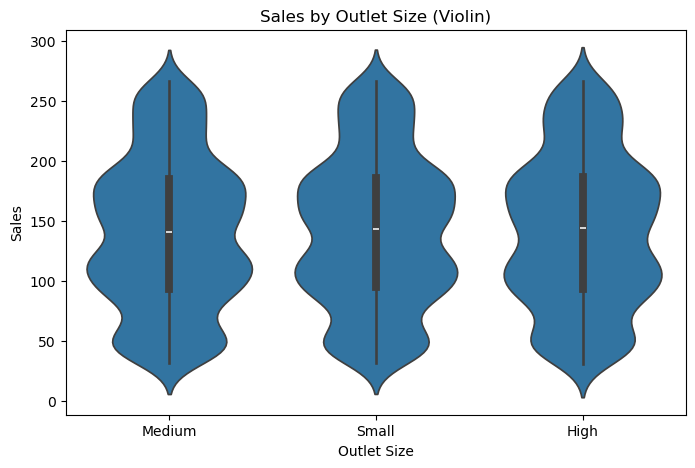

In [196]:
plt.figure(figsize=(8,5))
sns.violinplot(data=df, x="Outlet Size", y="Sales")
plt.title("Sales by Outlet Size (Violin)")
plt.show()


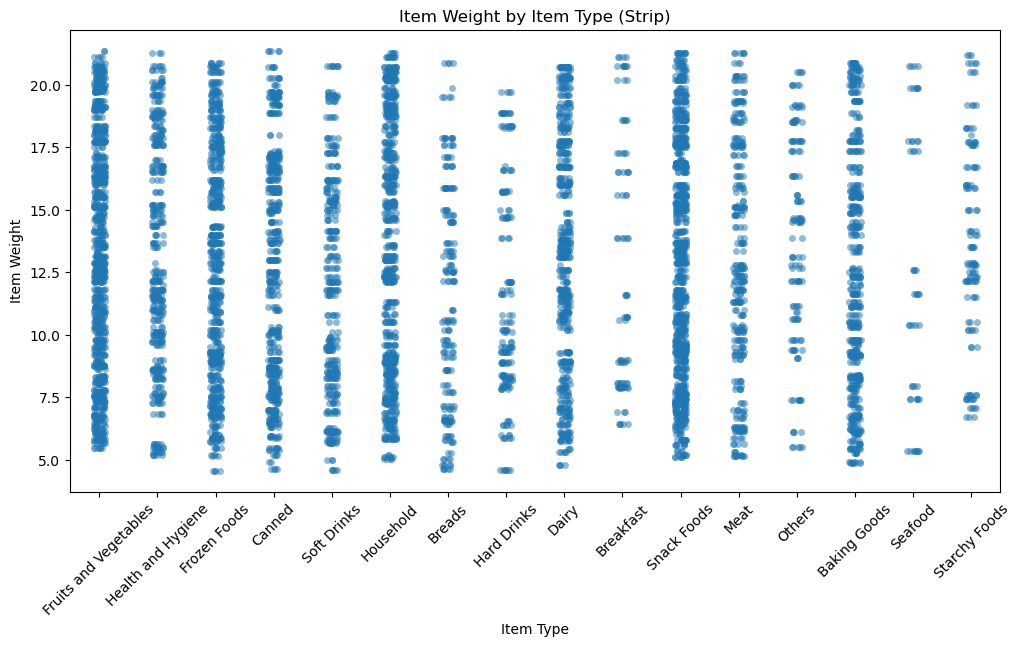

In [197]:
plt.figure(figsize=(12,6))
sns.stripplot(data=df, x="Item Type", y="Item Weight", jitter=True, alpha=0.5)
plt.xticks(rotation=45)
plt.title("Item Weight by Item Type (Strip)")
plt.show()


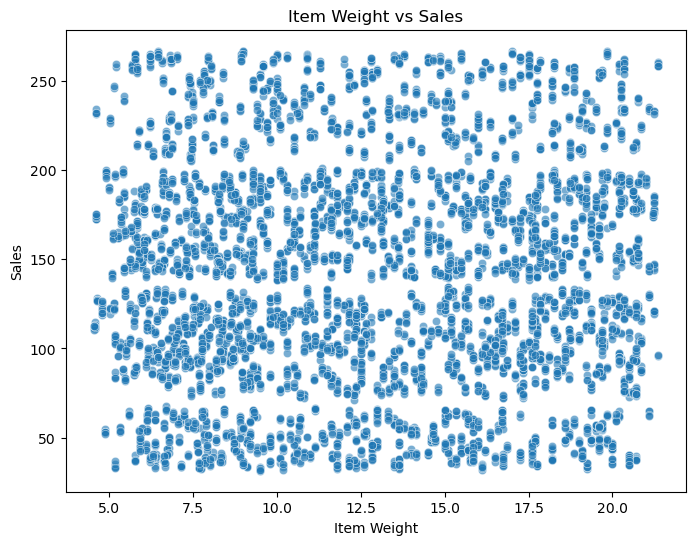

In [198]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x="Item Weight", y="Sales", alpha=0.6)
plt.title("Item Weight vs Sales")
plt.show()


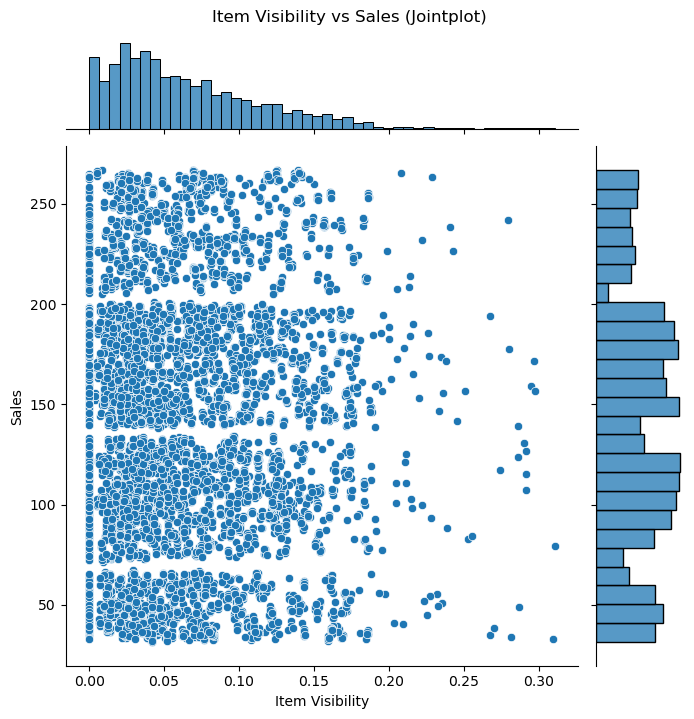

In [199]:
sns.jointplot(data=df, x="Item Visibility", y="Sales", kind="scatter", height=7)
plt.suptitle("Item Visibility vs Sales (Jointplot)", y=1.02)
plt.show()


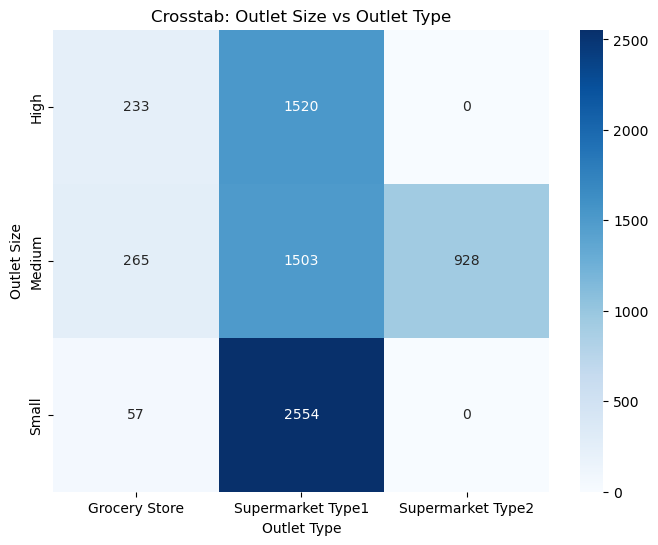

In [200]:
ct = pd.crosstab(df["Outlet Size"], df["Outlet Type"])
plt.figure(figsize=(8,6))
sns.heatmap(ct, annot=True, fmt="d", cmap="Blues")
plt.title("Crosstab: Outlet Size vs Outlet Type")
plt.show()


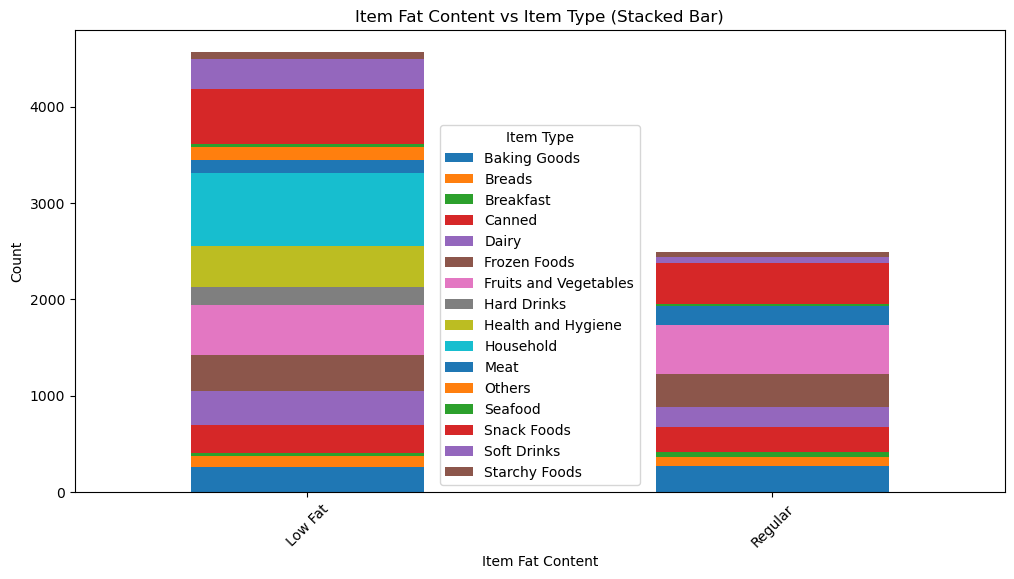

In [202]:
ct.plot(kind="bar", stacked=True, figsize=(12,6))
plt.title("Item Fat Content vs Item Type (Stacked Bar)")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()


## PLOTS FOR MULTIVARIATE

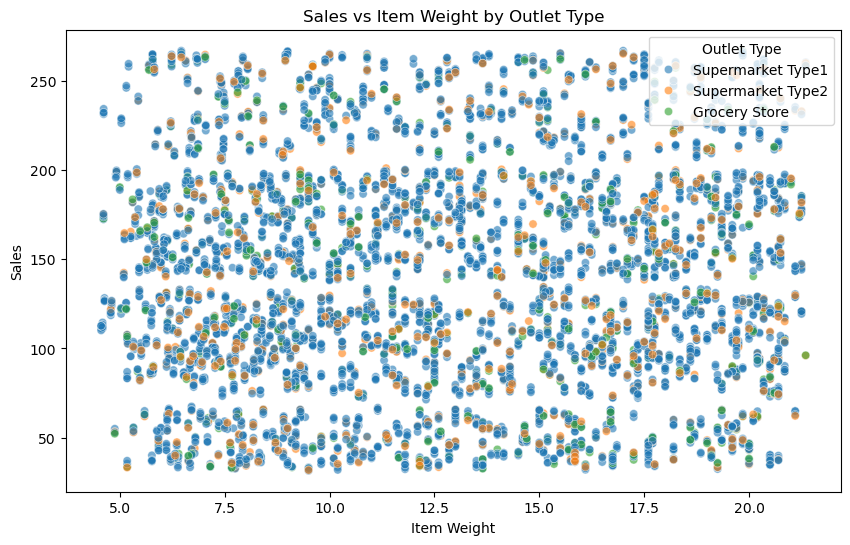

In [203]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x="Item Weight", y="Sales", hue="Outlet Type", alpha=0.6)
plt.title("Sales vs Item Weight by Outlet Type")
plt.show()


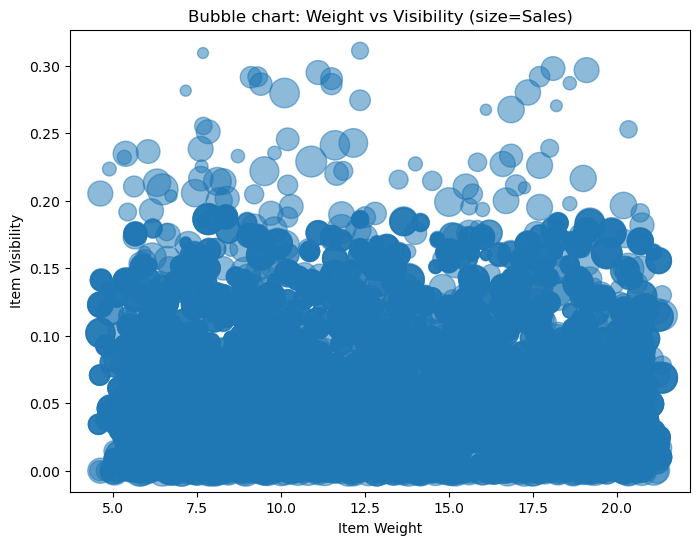

In [204]:
plt.figure(figsize=(8,6))
plt.scatter(df["Item Weight"], df["Item Visibility"], s=(df["Sales"].fillna(0)/df["Sales"].max())*500, alpha=0.5)
plt.xlabel("Item Weight")
plt.ylabel("Item Visibility")
plt.title("Bubble chart: Weight vs Visibility (size=Sales)")
plt.show()


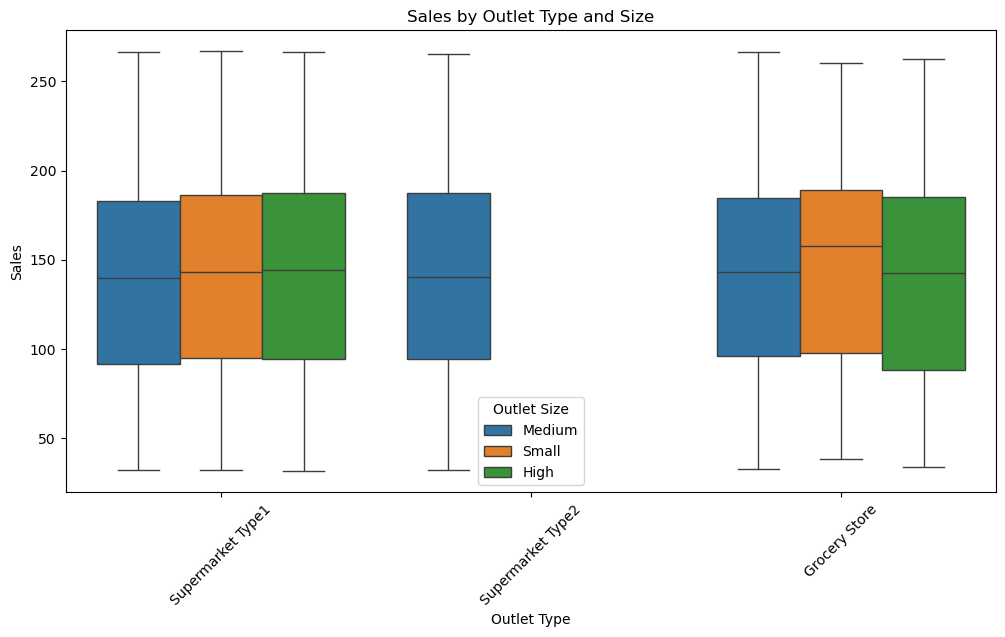

In [206]:
plt.figure(figsize=(12,6))
sns.boxplot(data=df, x="Outlet Type", y="Sales", hue="Outlet Size")
plt.xticks(rotation=45)
plt.title("Sales by Outlet Type and Size")
plt.show()
